***Import*** ***Packages***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import string

***Dataset***

In [3]:
df = pd.read_csv('/content/tweetsCSV.csv')
df.head(5)

,full_text,retweet_count,user_followers_count,favorite_count,place,coordinates,geo,created_at,id_str
0,RT @Brahmchaitanya: To fight an election — in ...,0,990,0,NaN,NaN,NaN,Sat Feb 19 17:43:45 +0000 2022,1495091750008160256
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,0,6186,0,NaN,NaN,NaN,Sat Feb 19 17:43:45 +0000 2022,1495091750037508100
2,"@KierstenHanly @zoewhittall It’s so windy, but...",0,433,0,NaN,NaN,NaN,Sat Feb 19 17:43:45 +0000 2022,1495091749903118339
3,RT @el_latori: I’m about to sign teddy up for ...,0,2974,0,NaN,NaN,NaN,Sat Feb 19 17:43:45 +0000 2022,1495091750116941835
4,@IckyWoodz Its always people from up north lmao,0,3562,0,NaN,NaN,NaN,Sat Feb 19 17:43:45 +0000 2022,1495091749999591431


***Rows and columns in dataset***

In [4]:
df.shape

(25000, 9)

In [5]:
df.sample(5)

,full_text,retweet_count,user_followers_count,favorite_count,place,coordinates,geo,created_at,id_str
18314,@wastedxvxhymn everybody gangsta until Raime b...,0,890,0,NaN,NaN,NaN,Sat Feb 19 17:49:51 +0000 2022,1495093284074524673
23962,RT @CryptoKing1st: $50 GIVEAWAY IN 6 HOURS\r\n...,0,21,0,NaN,NaN,NaN,Sat Feb 19 17:51:44 +0000 2022,1495093758903611392
21934,RT @twhitakerwrbl: This!!!🔥🔥🔥,0,335,0,NaN,NaN,NaN,Sat Feb 19 17:51:03 +0000 2022,1495093589143166983
23886,RT @Nana_CMD: Sometimes when i feel like givin...,0,837,0,NaN,NaN,NaN,Sat Feb 19 17:51:43 +0000 2022,1495093753744396291
6053,"RT @JamesGunn: Forgot to post this yesterday, ...",0,10,0,NaN,NaN,NaN,Sat Feb 19 17:45:46 +0000 2022,1495092256767889412


***Checking null values in each column***

In [6]:
df.isnull().sum()

full_text                   0
retweet_count               0
user_followers_count        0
favorite_count              0
place                   24849
coordinates             24997
geo                     24997
created_at                  0
id_str                      0
dtype: int64

In [7]:
df.columns

Index(['full_text', 'retweet_count', 'user_followers_count', 'favorite_count',
       'place', 'coordinates', 'geo', 'created_at', 'id_str'],
      dtype='object')

In [8]:
print('Length of data is',len(df))

Length of data is 25000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   full_text             25000 non-null  object
 1   retweet_count         25000 non-null  int64 
 2   user_followers_count  25000 non-null  int64 
 3   favorite_count        25000 non-null  int64 
 4   place                 151 non-null    object
 5   coordinates           3 non-null      object
 6   geo                   3 non-null      object
 7   created_at            25000 non-null  object
 8   id_str                25000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


In [10]:
df.dtypes

full_text               object
retweet_count            int64
user_followers_count     int64
favorite_count           int64
place                   object
coordinates             object
geo                     object
created_at              object
id_str                   int64
dtype: object

In [11]:
df=df.drop_duplicates(['full_text'])

In [12]:
print(df['geo'].isna().sum())
print(df['place'].isna().sum())
print(df['coordinates'].isna().sum())

17550
17403
17550


***Dropping the columns with null values which are independent of our labels***

In [13]:
df = df.drop(['place', 'coordinates', 'geo', 'id_str', 'retweet_count', 'favorite_count'], axis=1)
df.head(5)

,full_text,user_followers_count,created_at
0,RT @Brahmchaitanya: To fight an election — in ...,990,Sat Feb 19 17:43:45 +0000 2022
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,6186,Sat Feb 19 17:43:45 +0000 2022
2,"@KierstenHanly @zoewhittall It’s so windy, but...",433,Sat Feb 19 17:43:45 +0000 2022
3,RT @el_latori: I’m about to sign teddy up for ...,2974,Sat Feb 19 17:43:45 +0000 2022
4,@IckyWoodz Its always people from up north lmao,3562,Sat Feb 19 17:43:45 +0000 2022


In [14]:
df.isnull().sum()

full_text               0
user_followers_count    0
created_at              0
dtype: int64

In [15]:
df['full_text'][22]  # full text of any particular tweet

'RT @CoachWesGyrenes: They say you have to be strong up the middle well we just did that with the addition of these three warriors of the cl…'

In [16]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  3
Count of rows in the data is:  17553


***Preprocessing***

In [17]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [18]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [19]:
df['clean_text'] = np.vectorize(process_tweet)(df['full_text'])
df.head(10)

,full_text,user_followers_count,created_at,clean_text
0,RT @Brahmchaitanya: To fight an election — in ...,990,Sat Feb 19 17:43:45 +0000 2022,rt to fight an election in which everyone had ...
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,6186,Sat Feb 19 17:43:45 +0000 2022,rt yk that nct rumors sounds like kids just ma...
2,"@KierstenHanly @zoewhittall It’s so windy, but...",433,Sat Feb 19 17:43:45 +0000 2022,it so windy but the best to scare you is the ...
3,RT @el_latori: I’m about to sign teddy up for ...,2974,Sat Feb 19 17:43:45 +0000 2022,rt about to sign teddy up for acting classes t...
4,@IckyWoodz Its always people from up north lmao,3562,Sat Feb 19 17:43:45 +0000 2022,its always people from up north lmao
5,RT @ZiieRadebe: Do you know how many South Afr...,801,Sat Feb 19 17:43:45 +0000 2022,rt do you know how many south africans wake up...
6,@holliebrown1 We allow up to 2 weeks however i...,73731,Sat Feb 19 17:43:45 +0000 2022,we allow up to weeks however if they receive ...
7,RT @stevesilver72: Sinema is running nonstop T...,21,Sat Feb 19 17:43:45 +0000 2022,rt sinema is running nonstop tv ads in phoenix...
8,non-uk person here but i grew up watching cric...,4206,Sat Feb 19 17:43:45 +0000 2022,non uk person here but grew up watching cricke...
9,If you want to know that I don't have faith ma...,395,Sat Feb 19 17:43:45 +0000 2022,if you want to know that don have faith maybe ...


In [20]:
df.columns

Index(['full_text', 'user_followers_count', 'created_at', 'clean_text'], dtype='object')

***removing short words a, an, the basically words of len less than 3 are removed***

In [21]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [22]:
df.head()

,full_text,user_followers_count,created_at,clean_text
0,RT @Brahmchaitanya: To fight an election — in ...,990,Sat Feb 19 17:43:45 +0000 2022,fight election which everyone written with mig...
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,6186,Sat Feb 19 17:43:45 +0000 2022,that rumors sounds like kids just made story
2,"@KierstenHanly @zoewhittall It’s so windy, but...",433,Sat Feb 19 17:43:45 +0000 2022,windy best scare sudden crack night fallin
3,RT @el_latori: I’m about to sign teddy up for ...,2974,Sat Feb 19 17:43:45 +0000 2022,about sign teddy acting classes this right her...
4,@IckyWoodz Its always people from up north lmao,3562,Sat Feb 19 17:43:45 +0000 2022,always people from north lmao


***Finding subjectivity and polarity of tweets with TextBlob***

In [23]:
from textblob import TextBlob
# function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# columns for subjectivity and polarity
df['Subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['Polarity'] = df['clean_text'].apply(getPolarity)
df.head()

,full_text,user_followers_count,created_at,clean_text,Subjectivity,Polarity
0,RT @Brahmchaitanya: To fight an election — in ...,990,Sat Feb 19 17:43:45 +0000 2022,fight election which everyone written with mig...,0.550000,0.350000
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,6186,Sat Feb 19 17:43:45 +0000 2022,that rumors sounds like kids just made story,0.000000,0.000000
2,"@KierstenHanly @zoewhittall It’s so windy, but...",433,Sat Feb 19 17:43:45 +0000 2022,windy best scare sudden crack night fallin,0.400000,0.500000
3,RT @el_latori: I’m about to sign teddy up for ...,2974,Sat Feb 19 17:43:45 +0000 2022,about sign teddy acting classes this right her...,0.278571,0.428571
4,@IckyWoodz Its always people from up north lmao,3562,Sat Feb 19 17:43:45 +0000 2022,always people from north lmao,1.000000,0.600000


***Labels-Negative(0) and Positive(1)***

In [24]:
def getAnalysis(score):
  if score<0:
    return 0
  else:
    return 1
df['label'] = df['Polarity'].apply(getAnalysis)
df.head()

,full_text,user_followers_count,created_at,clean_text,Subjectivity,Polarity,label
0,RT @Brahmchaitanya: To fight an election — in ...,990,Sat Feb 19 17:43:45 +0000 2022,fight election which everyone written with mig...,0.550000,0.350000,1
1,RT @ddalgi_bunny: yk that nct rumors sounds li...,6186,Sat Feb 19 17:43:45 +0000 2022,that rumors sounds like kids just made story,0.000000,0.000000,1
2,"@KierstenHanly @zoewhittall It’s so windy, but...",433,Sat Feb 19 17:43:45 +0000 2022,windy best scare sudden crack night fallin,0.400000,0.500000,1
3,RT @el_latori: I’m about to sign teddy up for ...,2974,Sat Feb 19 17:43:45 +0000 2022,about sign teddy acting classes this right her...,0.278571,0.428571,1
4,@IckyWoodz Its always people from up north lmao,3562,Sat Feb 19 17:43:45 +0000 2022,always people from north lmao,1.000000,0.600000,1


In [25]:
df.sample(5)

,full_text,user_followers_count,created_at,clean_text,Subjectivity,Polarity,label
7312,That was the CUTEST,204,Sat Feb 19 17:46:11 +0000 2022,that cutest,0.0,0.0,1
672,@mcassieP @NailHard @SileneKitty @ezralevant T...,89,Sat Feb 19 17:43:58 +0000 2022,they have reduce their inpatient capacity buil...,0.0,0.0,1
1153,"RT @BBea53: Saturday night, what are you up to...",432,Sat Feb 19 17:44:07 +0000 2022,saturday night what shall making entertainment,0.0,0.0,1
12089,RT @shannonrwatts: After police arrested a man...,54,Sat Feb 19 17:47:46 +0000 2022,after police arrested threatening shoot queens...,0.0,0.0,1
7580,@CPC_HQ your convoy clowns are speaking. How n...,482,Sat Feb 19 17:46:16 +0000 2022,your convoy clowns speaking nuts have align yo...,0.0,0.0,1


In [26]:
df['label'].unique()

array([1, 0])

In [27]:
df['label'].nunique()

2

In [28]:
df['label'].value_counts()

1    14189
0     3364
Name: label, dtype: int64

***Plotting the distribution for dataset.***

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

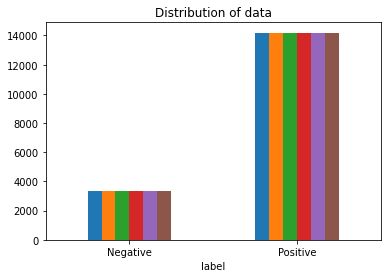

In [29]:
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

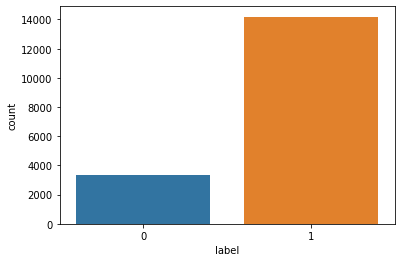

In [30]:
import seaborn as sns
sns.countplot(x='label', data=df)

***Stemming***

In [31]:
from nltk.stem.porter import *
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
def stemming(content):
  # stemmed_content = content.lower()
  stemmed_content = content.split()
  stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content
df['clean_text'] = df['clean_text'].apply(stemming)

***Most used words***

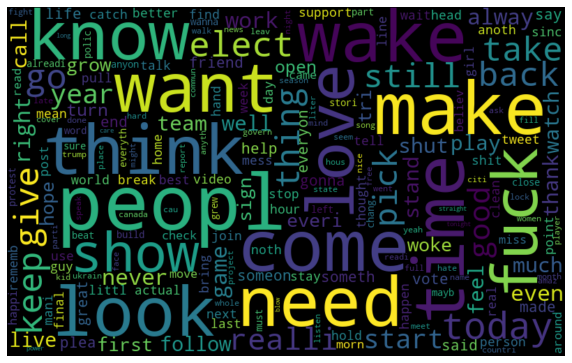

In [35]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['clean_text']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

***Most used negative words***

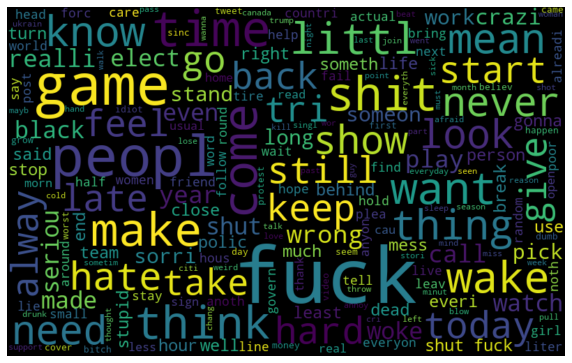

In [36]:
normal_words= ' '.join([text for text in df['clean_text'][df['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

***Most used positive words***

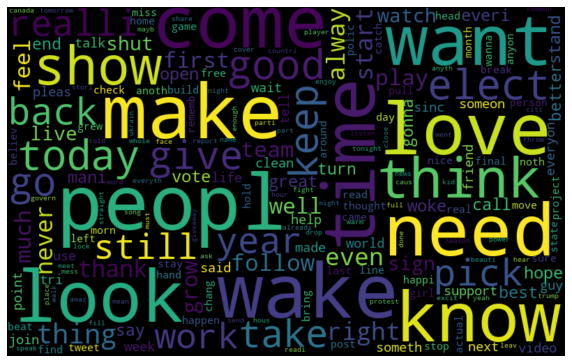

In [37]:
normal_words= ' '.join([text for text in df['clean_text'][df['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

***applying assorted techniques like bag of words,TF-IDF for converting data into features***

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

***Bag-of-words***

In [39]:
#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text']) # tokenize and build vocabulary
bow.shape

(17553, 1000)

***TF-IDF*** (The below code is commented out because CountVectorizer gives better accuracy in this sentiment analysis than tf-idf.)

In [40]:

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

# tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
# tfidf.shape

***Splitting***

In [41]:
df=df.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'],
                                                    test_size=0.2, random_state=69)

***Printing splitted dataset sizes***

In [42]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (14042, 1000)
X_test_shape :  (3511, 1000)
y_train_shape :  (14042,)
y_test_shape :  (3511,)


***Train and predict - Naive Bayes***

In [43]:
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

***Printing Confusion Matrix***

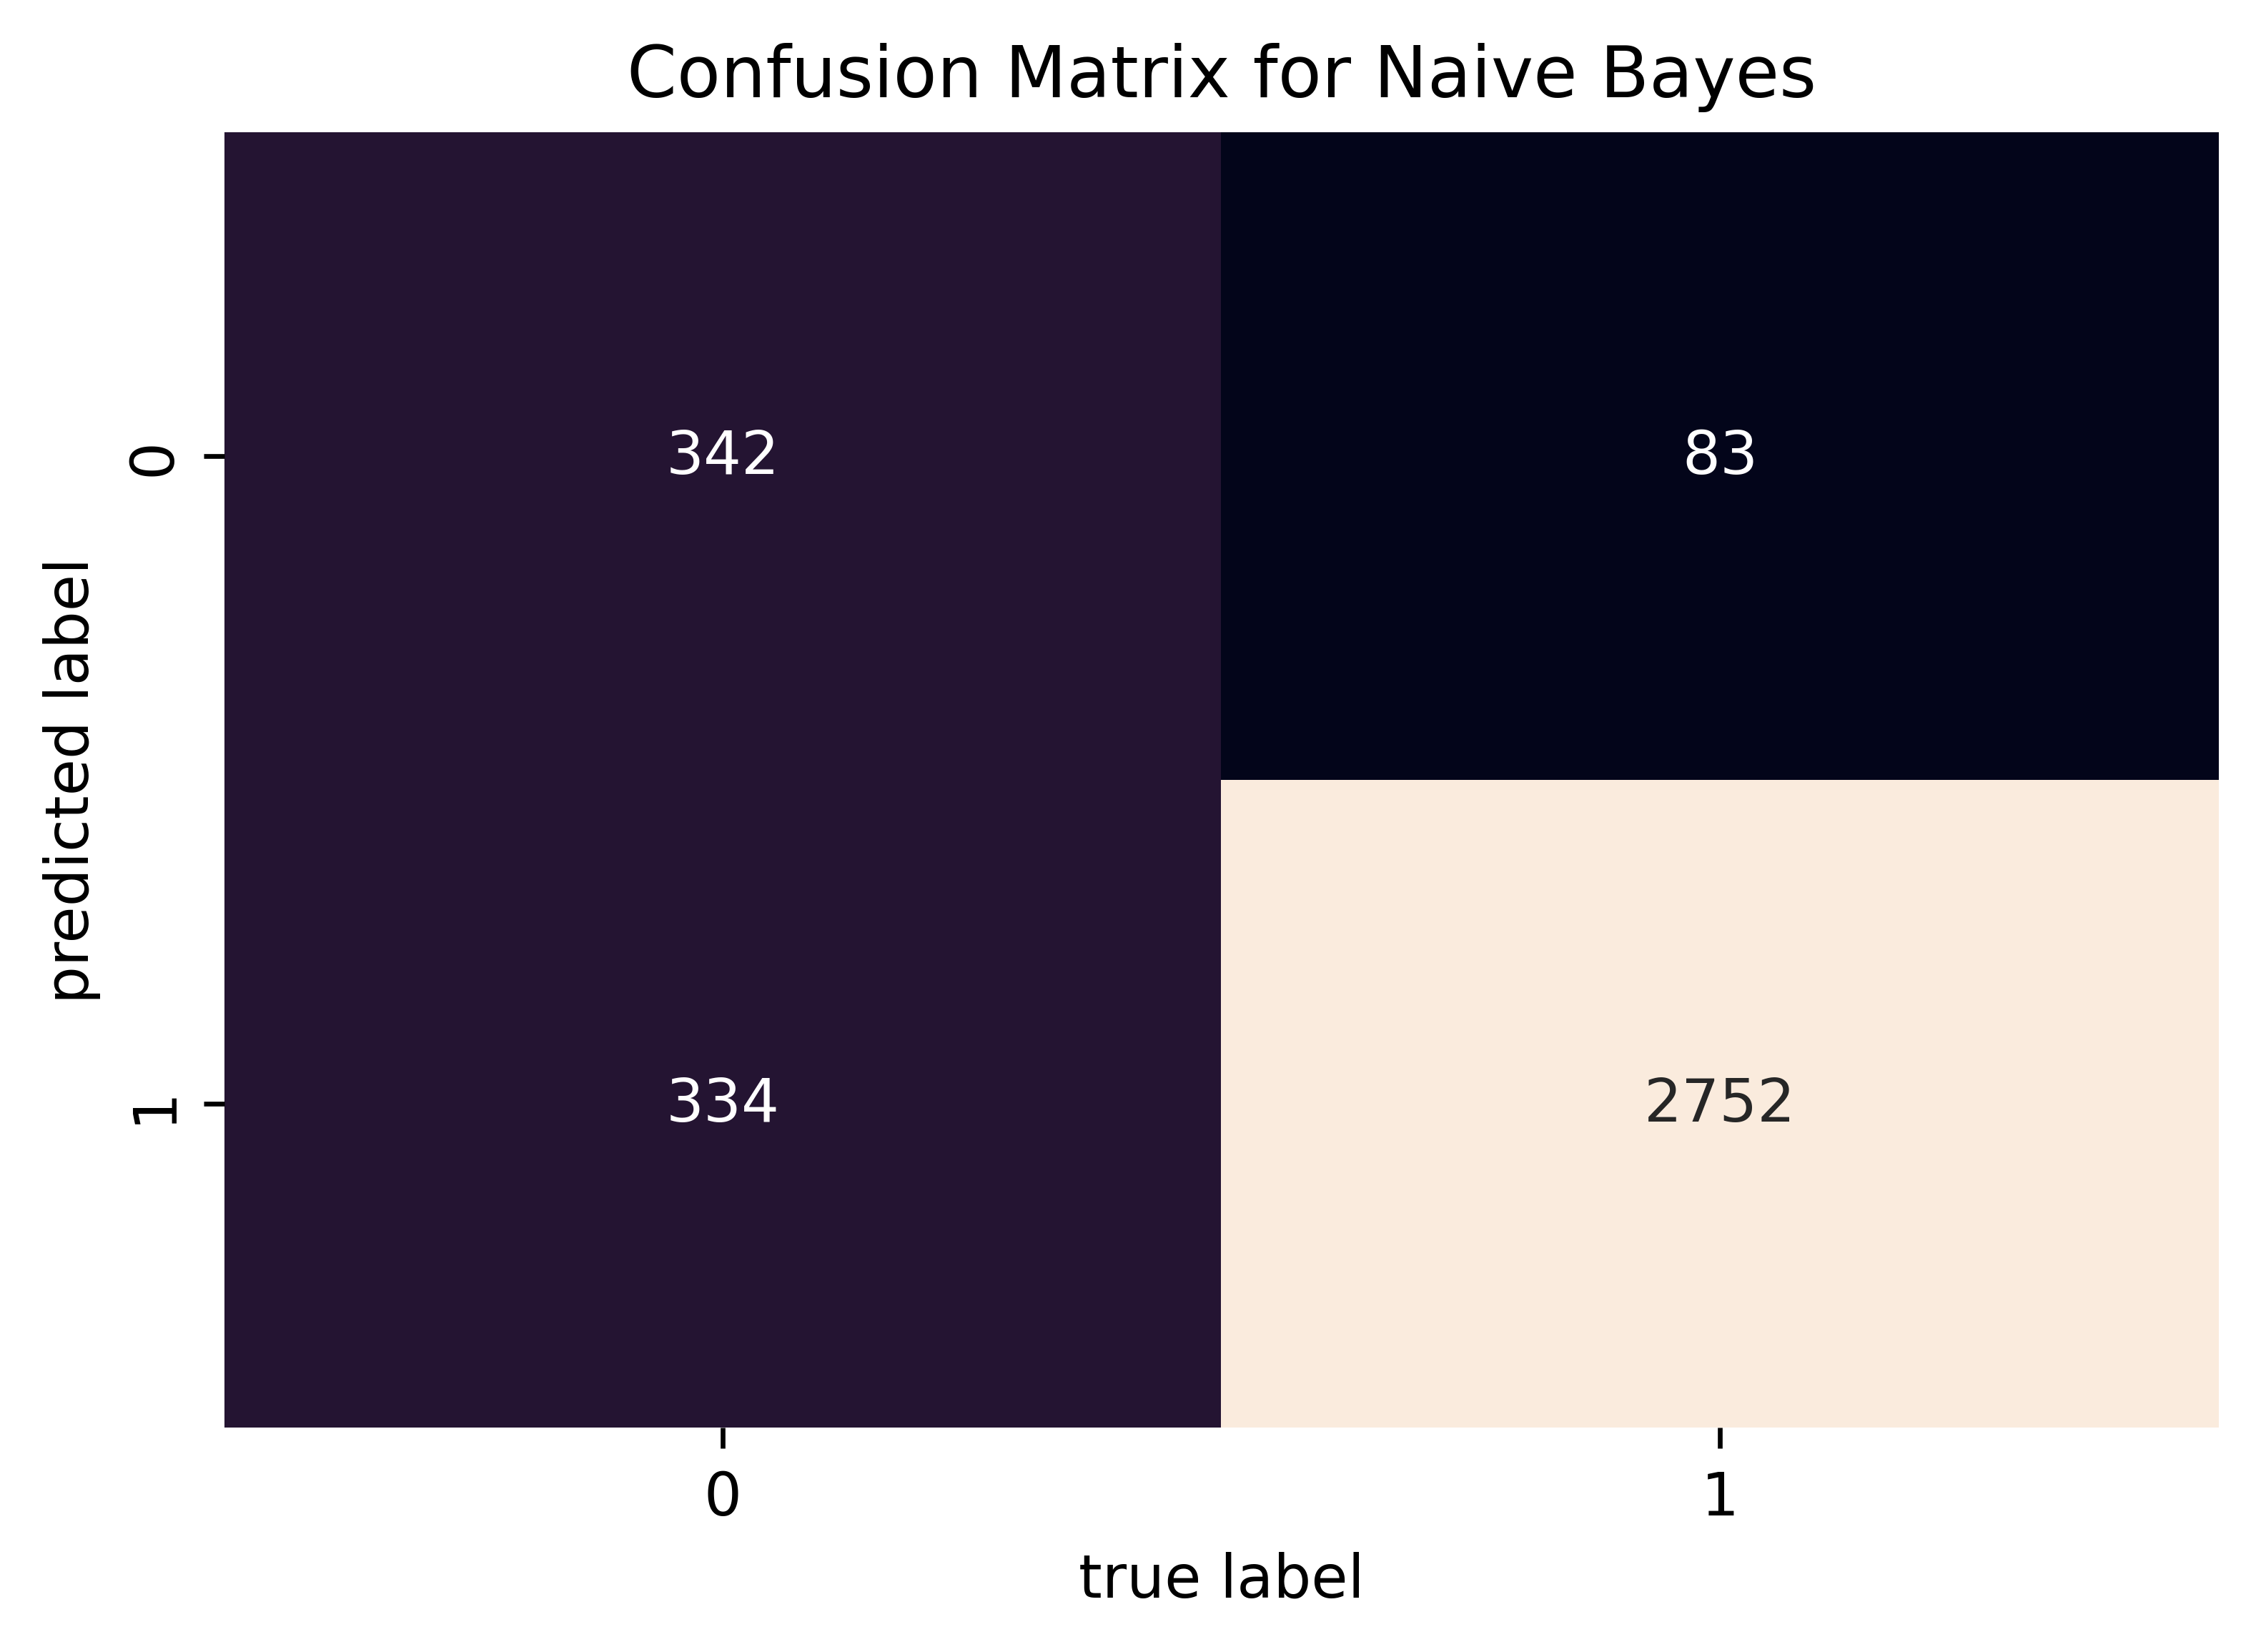

In [47]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

***Accuracy of our prediction***

In [48]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8812304186841355


***Precision, Recall, and Accuracy***

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62       676
           1       0.89      0.97      0.93      2835

    accuracy                           0.88      3511
   macro avg       0.85      0.74      0.78      3511
weighted avg       0.88      0.88      0.87      3511



***Drawing ROC curve***

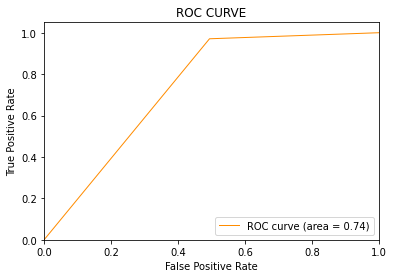

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_naive)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()